## Sebagai catatan tambahan, file `catatan.md` disisipkan sebagai informasi tambahan

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Preparation

## data inspection

In [2]:
# Load the dataset
df = pd.read_csv('case_hotel_booking.csv')

In [3]:
# Basic info
df.shape

(119390, 36)

In [4]:
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,is_canceled
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,0.0,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,0.0,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,75.0,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,0
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,75.0,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,0
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,98.0,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498,0


In [5]:
df.tail()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,is_canceled
119385,City Hotel,23,2017,August,35,30,2,5,2,0.0,...,96.14,0,0,Check-Out,9/6/2017,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,0
119386,City Hotel,102,2017,August,35,31,2,5,3,0.0,...,225.43,0,2,Check-Out,9/7/2017,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,0
119387,City Hotel,34,2017,August,35,31,2,5,2,0.0,...,157.71,0,4,Check-Out,9/7/2017,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,0
119388,City Hotel,109,2017,August,35,31,2,5,2,0.0,...,104.40,0,0,Check-Out,9/7/2017,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,0
119389,City Hotel,205,2017,August,35,29,2,7,2,0.0,...,151.20,0,2,Check-Out,9/7/2017,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [7]:
df.describe(include='all')  # Include object, float, int

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,is_canceled
count,119390,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,...,119390.000000,119390.000000,119390.000000,119390,119390,119390,119390,119390,119390,119390.000000
unique,2,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3,926,81503,115889,119390,9000,NaN
top,City Hotel,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Check-Out,10/21/2015,Michael Johnson,Michael.C@gmail.com,422-804-6403,************3627,NaN
freq,79330,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,75166,1461,48,6,1,28,NaN
mean,NaN,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,...,101.831122,0.062518,0.571363,NaN,NaN,NaN,NaN,NaN,NaN,0.370416
std,NaN,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,...,50.535790,0.245291,0.792798,NaN,NaN,NaN,NaN,NaN,NaN,0.482918
min,NaN,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-6.380000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,69.290000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,94.575000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,126.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [8]:
# Check for missing values
# more detailed one
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))

                                Missing Values  Percentage
hotel                                        0    0.000000
lead_time                                    0    0.000000
arrival_date_year                            0    0.000000
arrival_date_month                           0    0.000000
arrival_date_week_number                     0    0.000000
arrival_date_day_of_month                    0    0.000000
stays_in_weekend_nights                      0    0.000000
stays_in_week_nights                         0    0.000000
adults                                       0    0.000000
children                                     4    0.003350
babies                                       0    0.000000
meal                                         0    0.000000
country                                    488    0.408744
market_segment                               0    0.000000
distribution_channel                         0    0.000000
is_repeated_guest                            0    0.0000

In [9]:
df.duplicated().sum()

np.int64(0)

## visualization test before cleaning

In [10]:
# # Before cleaning: Visualize missing values
# plt.figure(figsize=(12, 6))
# sns.heatmap(df, cbar=False, cmap='viridis')
# plt.title('Missing Values Before Cleaning')
# plt.show()

## cleaning process

### handle missing values

In [11]:
# Isi missing value 'agent' dengan kategori khusus (-1 sebagai penanda unknown agent)
df['agent'].fillna(-1, inplace=True)

# Drop kolom 'company' karena 94% missing
df.drop(columns='company', inplace=True)

# handle untuk children field
df['children'].fillna(df['children'].median(), inplace=True)

# handle untuk country
df['country'].fillna(df['country'].mode()[0], inplace=True)

C:\Users\kraun\AppData\Local\Temp\ipykernel_22128\3889213689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(-1, inplace=True)
C:\Users\kraun\AppData\Local\Temp\ipykernel_22128\3889213689.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

### change to datetime for reservation status date

In [12]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

### pengecekan ulang hasil

In [13]:
# cek ulang
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   lead_time                       119390 non-null  int64         
 2   arrival_date_year               119390 non-null  int64         
 3   arrival_date_month              119390 non-null  object        
 4   arrival_date_week_number        119390 non-null  int64         
 5   arrival_date_day_of_month       119390 non-null  int64         
 6   stays_in_weekend_nights         119390 non-null  int64         
 7   stays_in_week_nights            119390 non-null  int64         
 8   adults                          119390 non-null  int64         
 9   children                        119390 non-null  float64       
 10  babies                          119390 non-null  int64  

In [14]:
# cek df head ulang
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,is_canceled
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,0
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,0
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,0


In [15]:
# df head untuk 20 data pertama
df.head(20)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,is_canceled
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,0
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,0
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,0
5,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,98.00,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263,0
6,Resort Hotel,0,2015,July,27,1,0,2,2,0.0,...,107.00,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994,0
7,Resort Hotel,9,2015,July,27,1,0,2,2,0.0,...,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,0
8,Resort Hotel,85,2015,July,27,1,0,3,2,0.0,...,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,1
9,Resort Hotel,75,2015,July,27,1,0,3,2,0.0,...,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,1


## Preprocess

### Text Semantic

In [16]:
text_semantic_cols = ['name', 'email', 'phone-number', 'credit_card']
# drop text semantic columns
df.drop(columns=text_semantic_cols, inplace=True)

### Ordinal Semantic

In [17]:
# map the month
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# convert month to number
df['arrival_date_month'] = df['arrival_date_month'].map(month_map)

### Nominal Semantic

In [18]:
# handle for country
# Group rare countries as 'Other' to reduce dimensionality
top_countries = df['country'].value_counts().nlargest(10).index
df['country'] = df['country'].apply(lambda x: x if x in top_countries else 'Other')
df = pd.get_dummies(df, columns=['country'])

In [19]:
# handle for others
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel',
                'reserved_room_type', 'assigned_room_type',
                'deposit_type', 'customer_type', 'reservation_status']

df = pd.get_dummies(df, columns=one_hot_cols)

### Handle Outlier for ADR

In [20]:
# 1. Hitung IQR
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1

# 2. Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filter data yang masih dalam range wajar
df = df[(df['adr'] >= lower_bound) & (df['adr'] <= upper_bound)]

# 4. Cek shape baru
print(f"Jumlah data setelah menghapus outlier pada ADR: {df.shape[0]} baris")


Jumlah data setelah menghapus outlier pada ADR: 115597 baris


### Check the data again

In [21]:
# check the data again
df.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,342,2015,7,27,1,0,0,2,0.0,0,...,True,False,False,False,False,True,False,False,True,False
1,737,2015,7,27,1,0,0,2,0.0,0,...,True,False,False,False,False,True,False,False,True,False
2,7,2015,7,27,1,0,1,1,0.0,0,...,True,False,False,False,False,True,False,False,True,False
3,13,2015,7,27,1,0,1,1,0.0,0,...,True,False,False,False,False,True,False,False,True,False
4,14,2015,7,27,1,0,2,2,0.0,0,...,True,False,False,False,False,True,False,False,True,False


In [22]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115597 entries, 0 to 119389
Data columns (total 84 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   lead_time                       115597 non-null  int64         
 1   arrival_date_year               115597 non-null  int64         
 2   arrival_date_month              115597 non-null  int64         
 3   arrival_date_week_number        115597 non-null  int64         
 4   arrival_date_day_of_month       115597 non-null  int64         
 5   stays_in_weekend_nights         115597 non-null  int64         
 6   stays_in_week_nights            115597 non-null  int64         
 7   adults                          115597 non-null  int64         
 8   children                        115597 non-null  float64       
 9   babies                          115597 non-null  int64         
 10  is_repeated_guest               115597 non-null  int64       

# EDA with visualization

In [23]:
# # visualize the correlation matrix
# plt.figure(figsize=(20, 20))
# sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

## Visualisasi Korelasi `is_canceled` dengan fitur lain

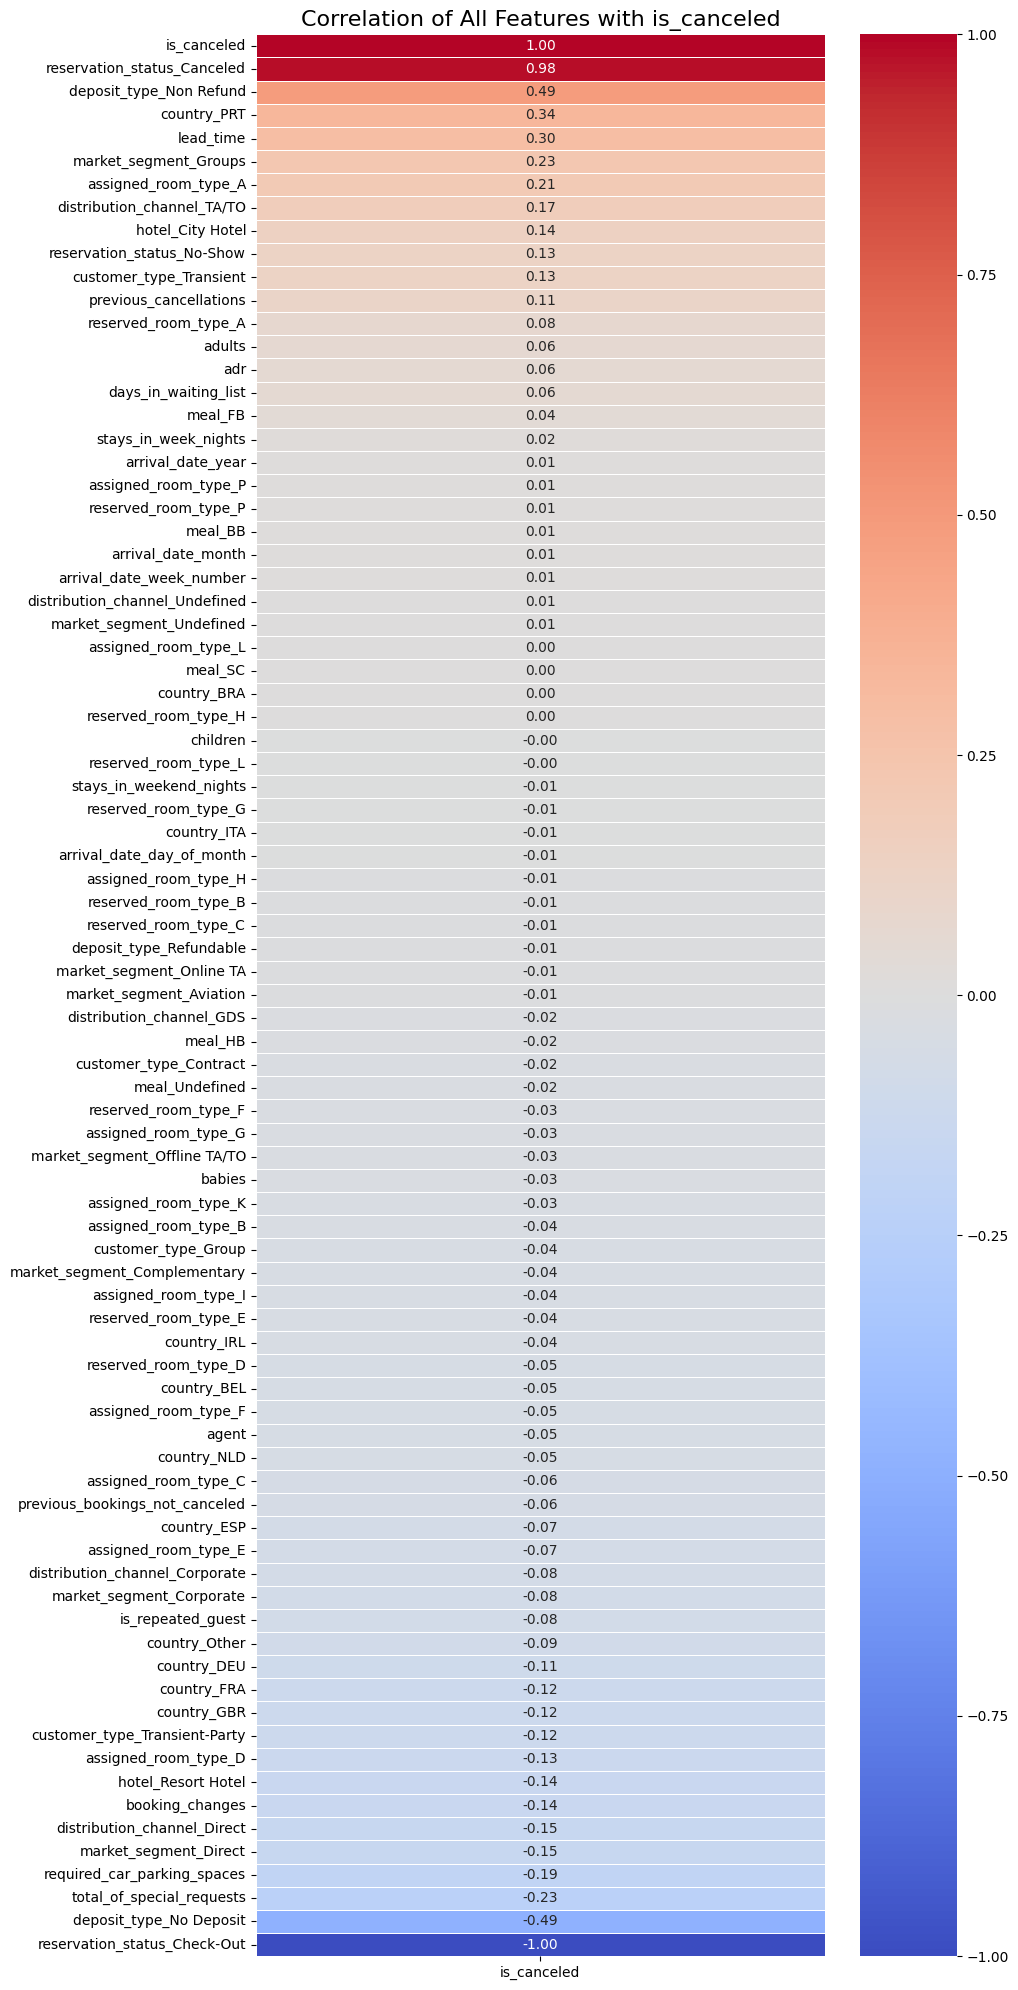

In [24]:
# Filter numerik dan boolean
numerical_df = df.select_dtypes(include=['int64', 'float64', 'bool'])

# Hitung korelasi
correlation_matrix = numerical_df.corr()

# Ambil korelasi terhadap target is_canceled
corr_target = correlation_matrix[['is_canceled']].sort_values(by='is_canceled', ascending=False)

# Plot heatmap dengan jarak label y yang lebih lebar
plt.figure(figsize=(10, 20))  # Tinggikan figure agar label y tidak tabrakan
ax = sns.heatmap(corr_target, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar=True)

# Rotasi label dan sesuaikan jaraknya
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
plt.title('Correlation of All Features with is_canceled', fontsize=16)
plt.tight_layout()
plt.show()


## Visualisasi lainnya

### Barplot: Distribusi Jumlah Permintaan Khusus

Text(0.5, 1.0, 'Pembatalan berdasarkan Jumlah Permintaan Khusus')

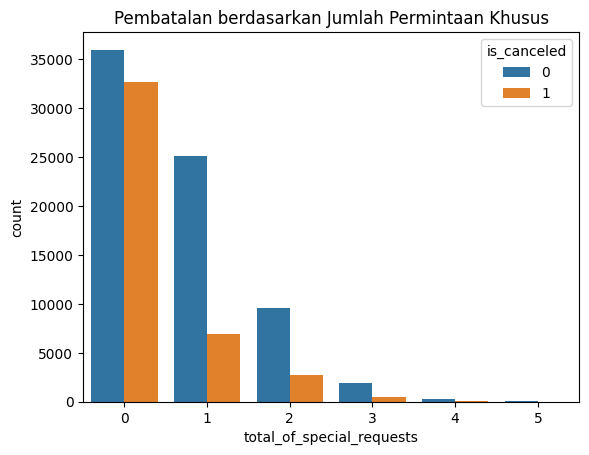

In [25]:
sns.countplot(data=df, x='total_of_special_requests', hue='is_canceled')
plt.title('Pembatalan berdasarkan Jumlah Permintaan Khusus')

### Barplot: Jumlah Booking Per bulan dengan `arrival_date_month`

Text(0.5, 1.0, 'Jumlah Booking per Bulan')

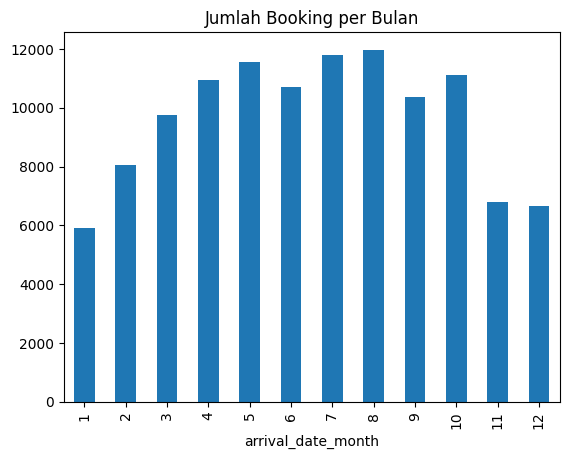

In [26]:
monthly_counts = df['arrival_date_month'].value_counts().sort_index()
monthly_counts.plot(kind='bar')
plt.title('Jumlah Booking per Bulan')


In [27]:
df_viz = df.copy()
df_viz['month'] = df_viz['reservation_status_date'].dt.to_period('M')
df_viz['total_person'] = df_viz['adults'] + df_viz['children'] + df_viz['babies']


### Lineplot: Reservasi per Bulan

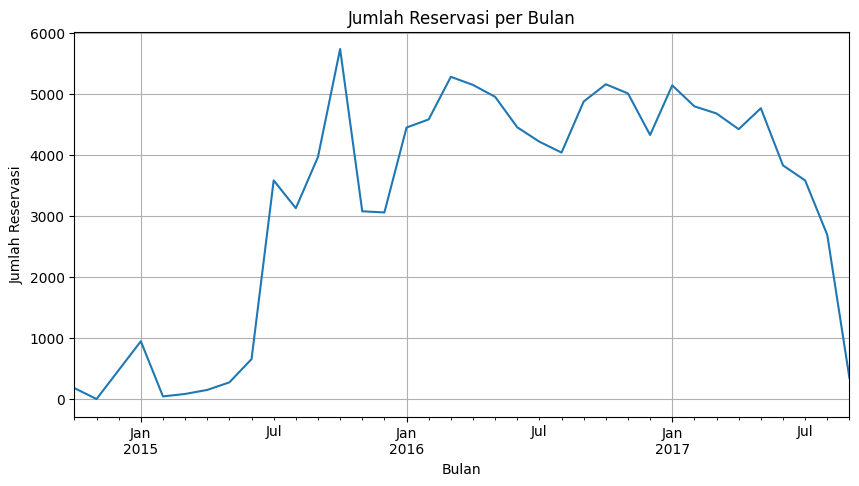

In [28]:
df_viz.groupby('month').size().plot(kind='line', title='Jumlah Reservasi per Bulan', figsize=(10,5))
plt.xlabel('Bulan')
plt.ylabel('Jumlah Reservasi')
plt.grid(True)
plt.show()


### Heatmap: Reservasi per Jenis Kamar per Bulan

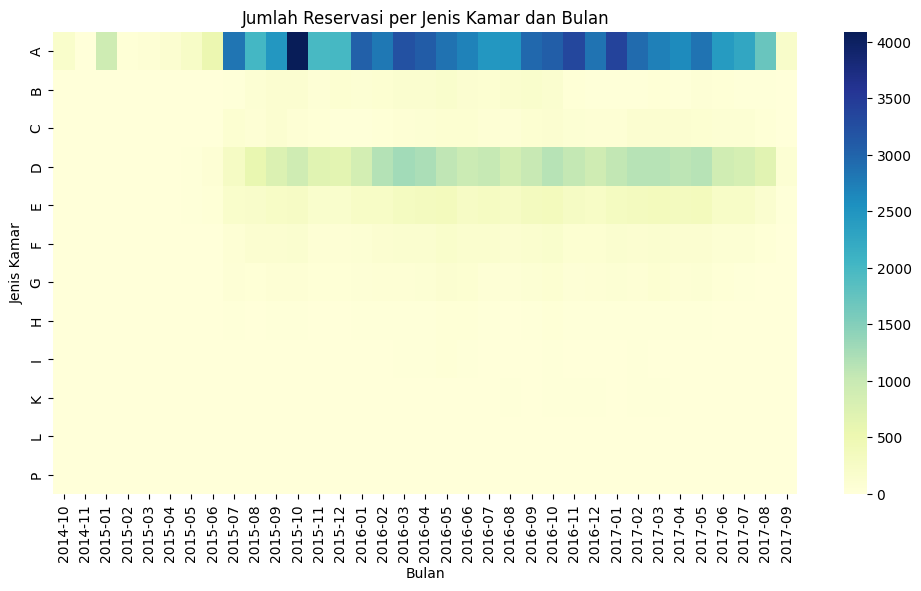

In [29]:
assigned_cols = [col for col in df_viz.columns if 'assigned_room_type_' in col]
df_viz['assigned_room'] = df_viz[assigned_cols].idxmax(axis=1).str.replace('assigned_room_type_', '')

room_month = pd.crosstab(df_viz['assigned_room'], df_viz['month'].astype(str))
plt.figure(figsize=(12,6))
sns.heatmap(room_month, cmap='YlGnBu')
plt.title('Jumlah Reservasi per Jenis Kamar dan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jenis Kamar')
plt.show()

### Jumlah Reservasi per Segmen Pasar

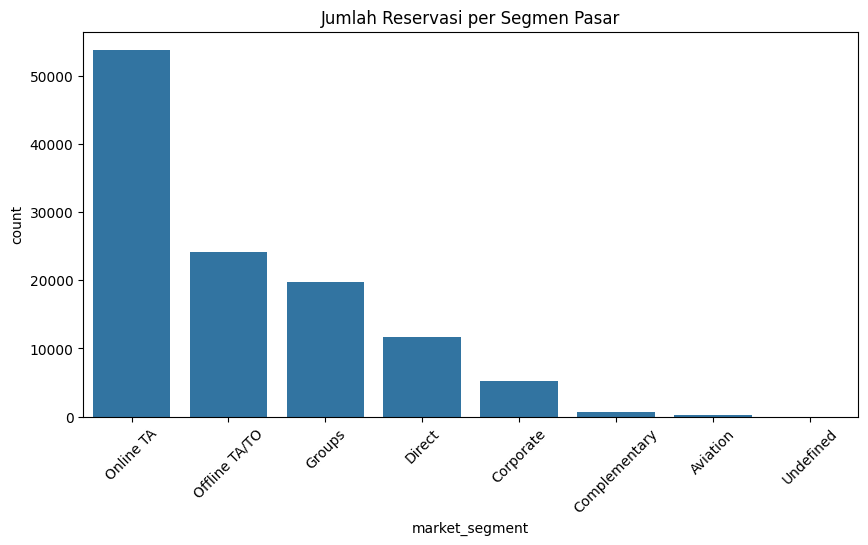

In [30]:
market_cols = [col for col in df_viz.columns if 'market_segment_' in col]
df_viz['market_segment'] = df_viz[market_cols].idxmax(axis=1).str.replace('market_segment_', '')

plt.figure(figsize=(10,5))
sns.countplot(x='market_segment', data=df_viz, order=df_viz['market_segment'].value_counts().index)
plt.title('Jumlah Reservasi per Segmen Pasar')
plt.xticks(rotation=45)
plt.show()

### Circle Plot: Booking Status

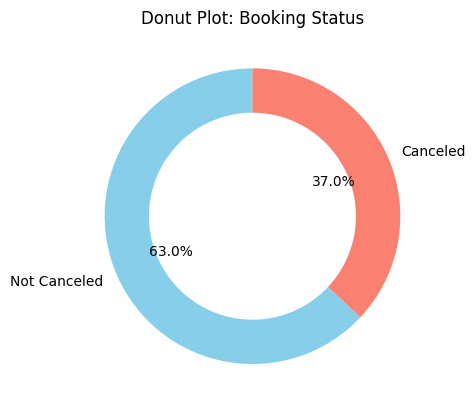

In [31]:
# Data for the donut plot
sizes = [df['is_canceled'].value_counts()[0], df['is_canceled'].value_counts()[1]]
labels = ['Not Canceled', 'Canceled']
colors = ['skyblue', 'salmon']

# Create the donut plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})
plt.title('Donut Plot: Booking Status')
plt.show()


### Bubble chart country dengan is_canceled dalam konteks total pemesanan

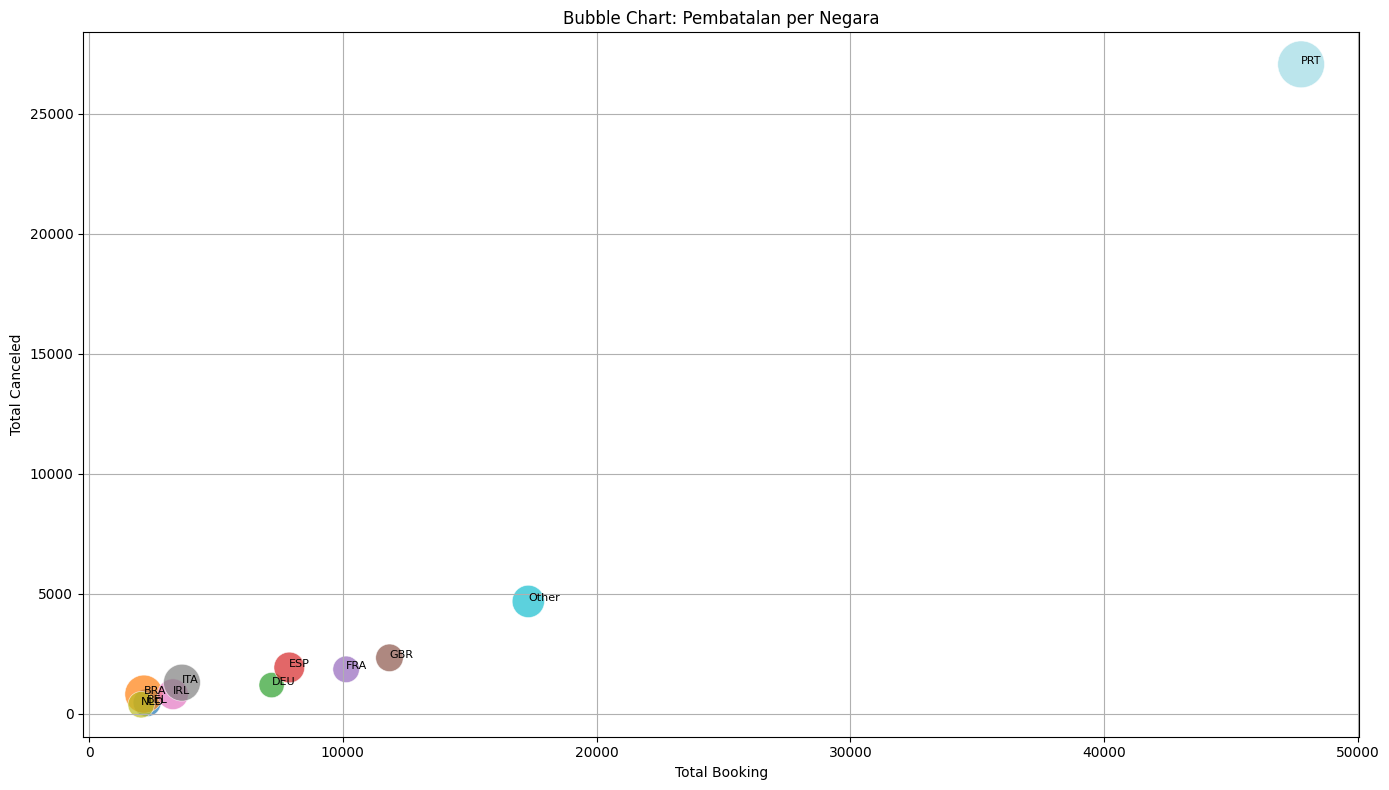

In [32]:

# Ambil semua kolom negara dari df_viz
country_cols = [col for col in df_viz.columns if col.startswith("country_")]

data = []

# Loop untuk hitung total booking dan cancel
for col in country_cols:
    country_name = col.replace("country_", "")
    total_booking = df_viz[col].sum()
    total_canceled = (df_viz[col] * df_viz['is_canceled']).sum()
    cancel_ratio = total_canceled / total_booking if total_booking != 0 else 0

    data.append({
        'Country': country_name,
        'Total_Booking': total_booking,
        'Total_Canceled': total_canceled,
        'Cancel_Ratio': cancel_ratio
    })

# Convert to DataFrame
bubble_df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    bubble_df['Total_Booking'],
    bubble_df['Total_Canceled'],
    s=bubble_df['Cancel_Ratio'] * 2000,  # scaling bubble size
    c=range(len(bubble_df)),  # color for each country
    cmap='tab20',
    alpha=0.7,
    edgecolors='w',
    linewidths=0.5
)

# Tambahkan label
for i, row in bubble_df.iterrows():
    plt.text(row['Total_Booking'], row['Total_Canceled'], row['Country'], fontsize=8)

plt.title('Bubble Chart: Pembatalan per Negara')
plt.xlabel('Total Booking')
plt.ylabel('Total Canceled')
plt.tight_layout()
plt.grid(True)
plt.show()

### Pie plot: Proporsi pengunjung per kategori

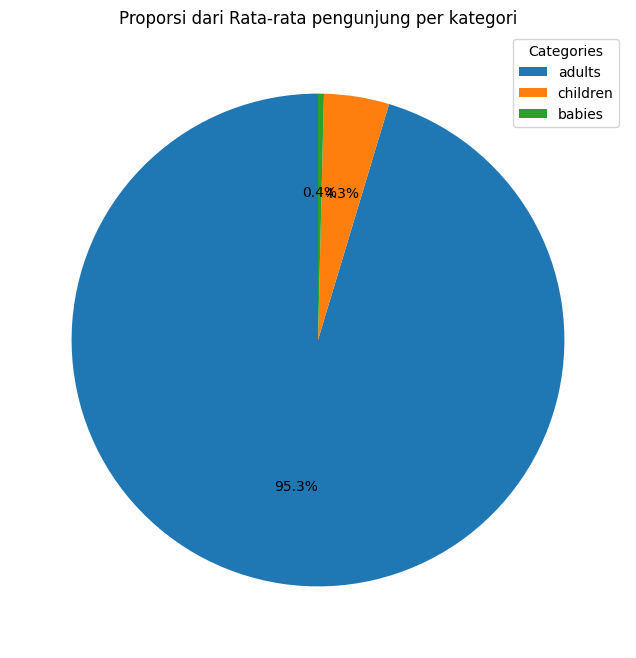

In [33]:
# Calculate the mean for each category
category_means = df_viz[['adults', 'children', 'babies']].mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    category_means, 
    labels=None,  # No labels on the pie chart
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#1f77b4', '#ff7f0e', '#2ca02c']
)

# Add a legend
plt.legend(wedges, category_means.index, title="Categories", loc="upper right")

# Add a title
plt.title('Proporsi dari Rata-rata pengunjung per kategori')
plt.show()

# Hipotesa yang telah disusun
| Hipotesis | Dugaan                                                                 | Alasan                                                                 |
|-----------|------------------------------------------------------------------------|------------------------------------------------------------------------|
| H1        | Semakin besar lead_time, maka semakin tinggi kemungkinan pembatalan (`is_canceled`).  | Karena tamu lebih punya waktu untuk berubah pikiran.                   |
| H2        | Tamu dengan deposit_type = Non Refund lebih jarang membatalkan.       | Karena tidak dapat uang kembali, tamu cenderung akan datang walau kondisi berubah. |
| H3        | Booking melalui Online TA atau Offline TA/TO lebih tinggi kemungkinan pembatalannya dibanding Direct atau Corporate. | Agen perjalanan lebih fleksibel dan sering digunakan untuk opsi pencarian murah tanpa komitmen tinggi. |
| H4        | Negara asal (country) tertentu punya tren pembatalan lebih tinggi.    | Misalnya tamu dari negara tertentu mungkin sering membatalkan karena jarak atau proses visa. |
| H5        | Semakin tinggi days_in_waiting_list, semakin besar kemungkinan dibatalkan. | Tamu bisa kehilangan minat jika harus menunggu terlalu lama untuk konfirmasi. |
| H6        | Jika seluruh fitur digunakan tanpa seleksi, model cenderung overfit dan performa di data uji bisa menurun. | Karena terlalu banyak informasi bisa membuat model mempelajari noise alih-alih pola nyata. |
| H7        | Penggunaan fitur dengan korelasi sedang ke target + menghindari fitur redundan bisa meningkatkan kestabilan model. | Korelasi moderat cukup kuat memberi sinyal, sementara menghindari duplikasi mencegah pembelajaran berlebih. |

# Model Prediction

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


## Semua fitur yang sudah di-preprocess (kecuali is_canceled sebagai target)

In [35]:
df_h6 = df.copy()

In [36]:
# 1. Setup data
X = df_h6.drop(columns=['is_canceled', 'reservation_status_date'])
y = df_h6['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# 2. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# 3. Model Init
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='rbf')
}


=== KNN ===
[[14478    54]
 [  228  8360]]


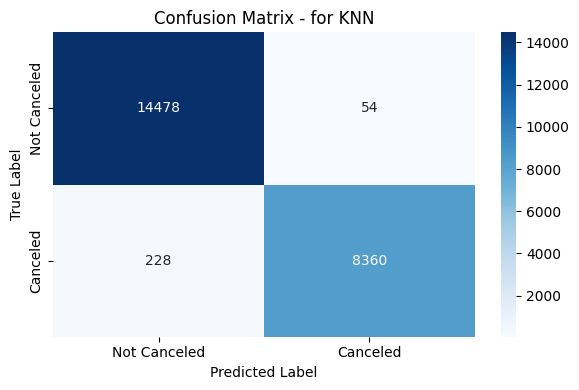

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14532
           1       0.99      0.97      0.98      8588

    accuracy                           0.99     23120
   macro avg       0.99      0.98      0.99     23120
weighted avg       0.99      0.99      0.99     23120


=== Naive Bayes ===
[[14532     0]
 [    0  8588]]


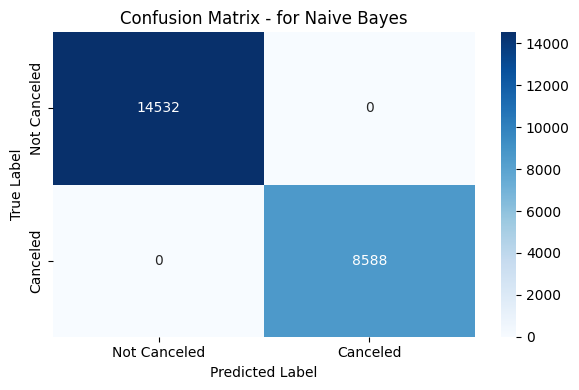

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14532
           1       1.00      1.00      1.00      8588

    accuracy                           1.00     23120
   macro avg       1.00      1.00      1.00     23120
weighted avg       1.00      1.00      1.00     23120


=== SVM ===
[[14532     0]
 [   14  8574]]


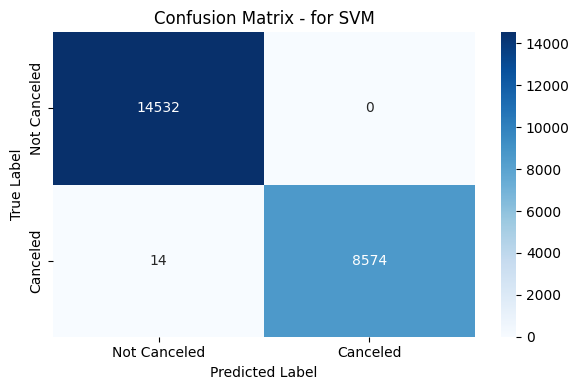

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14532
           1       1.00      1.00      1.00      8588

    accuracy                           1.00     23120
   macro avg       1.00      1.00      1.00     23120
weighted avg       1.00      1.00      1.00     23120



In [39]:
# 4. Training and Evaluation
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n=== {name} ===")
    print(confusion_matrix(y_test, y_pred))

    # visualize the confusion matrix in heatmap
    cm_labels = ['Not Canceled', 'Canceled']
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - for {name}')
    plt.tight_layout()
    plt.show()

    print(classification_report(y_test, y_pred))

## menerapkan k-fold untuk mengecek apakah model di atas sesuai akurasinya

In [40]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [41]:
# # 5-fold cross-validation
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# # initiat models
# models = {
#     'KNN': KNeighborsClassifier(n_neighbors=5),
#     'Naive Bayes': GaussianNB(),
# }

In [42]:
# for name, model in models.items():
#     scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
#     print(f"=== {name} ===")
#     print("Scores per fold:", scores)
#     print("Average accuracy:", scores.mean())
#     print()

## Penggunaan fitur dengan korelasi sedang ke target

In [43]:
df_h7 = df.copy()

In [44]:
selected_features = [
    'lead_time',
    'previous_cancellations',
    'deposit_type_Non Refund',
    'is_repeated_guest',
    'booking_changes',
    'customer_type_Transient',
    'country_PRT',
]

In [45]:
# 1. Setup data
X = df[selected_features]
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# 2. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# 3. Model Init
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='rbf')
}

In [ ]:
# 4. Training and Evaluation
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n=== {name} ===")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


=== KNN ===
[[12501  2031]
 [ 3338  5250]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82     14532
           1       0.72      0.61      0.66      8588

    accuracy                           0.77     23120
   macro avg       0.76      0.74      0.74     23120
weighted avg       0.76      0.77      0.76     23120


=== Naive Bayes ===
[[14461    71]
 [ 5287  3301]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     14532
           1       0.98      0.38      0.55      8588

    accuracy                           0.77     23120
   macro avg       0.86      0.69      0.70     23120
weighted avg       0.82      0.77      0.74     23120

